## Importing Lib. and Data

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
Data=pd.read_csv('Real_estate.csv').set_index("No")

In [12]:
Data.rename(columns={'X1 transaction date':'X1','X2 house age':'X2','X3 distance to the nearest MRT station':'X3',
                     'X4 number of convenience stores':'X4','X5 latitude':'X5','X6 longitude':'X6','Y house price of unit area':'Y'},inplace=True)

## Derivative of Cost Function

In [13]:
def der_cost0(T0,T1):
    return (T0 + (T1*xm) - ym)
def der_cost1(T0,T1):
    return ((T0*xm) + (T1*x2m) - xym)

## Cost Function

In [14]:
def J(T0,T1):
    return ((T0**2) + (T1**2)*(x2m) + y2m + (2*T0*T1*xm) - (2*T1*xym) - (2*T0*ym))/2

## |

In [15]:
X1=Data['X1']
X2=Data['X2']
X3=Data['X3']
X4=Data['X4']
X5=Data['X5']
X6=Data['X6']
Y=Data['Y']
H=[X2,X4,X5]
N=[11100,500000,1000]
A=[0.001,0.000001,0.00001]
Xn=['House Age','Number of convenience stores','Latitude']
m=414

pd.concat([Y,X4],axis=1).to_csv('aaa.csv',index=False)








House Age


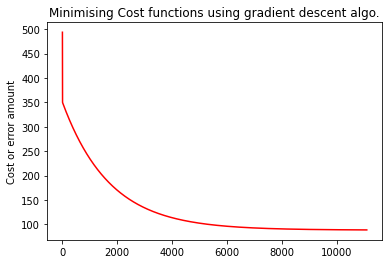

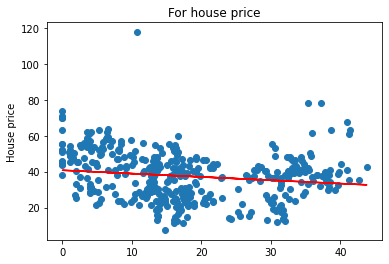

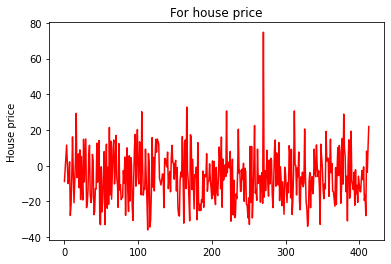








Number of convenience stores


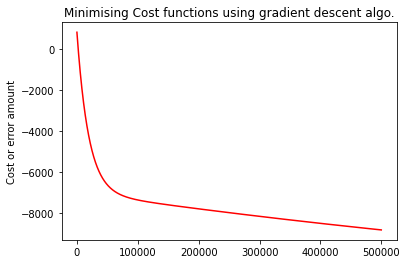

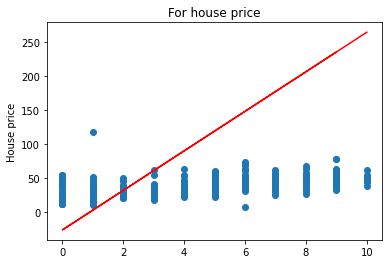

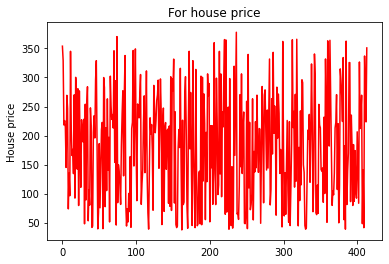








Latitude


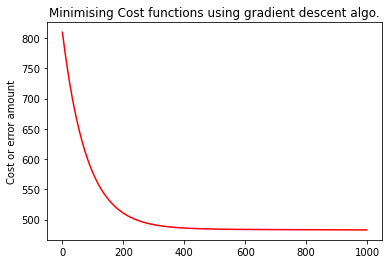

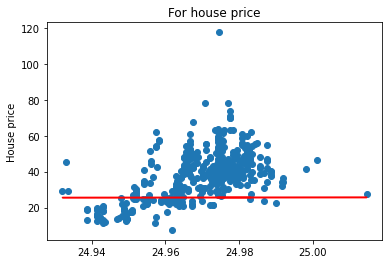

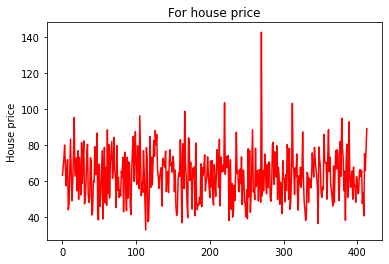

In [18]:
for i in range(3):
    print('\n\n\n\n\n\n')
    print(Xn[i])
    X=H[i]
    xm=np.mean(X)
    ym=np.mean(Y)
    x2m=np.mean(X**2)
    y2m=np.mean(Y**2)
    xym=np.mean(X2*Y)

    t0=0
    t1=0
    n=N[i]
    K=[]
    a=A[i]

    for i in range(n):
        p=t0-(a*der_cost0(t0,t1))
        q=t1-(a*der_cost1(t0,t1))
        t0=p
        t1=q
        k=J(t0,t1)
        K.append(k)

    M1=np.arange(0,n,1)
    plt.plot(M1,K,'red')
    plt.title("Minimising Cost functions using gradient descent algo.")
    plt.ylabel('Cost or error amount')
    plt.show()

    #Final result
    plt.scatter(X,Y)
    plt.plot(X,t0+t1*X,'red')
    plt.title("For house price")
    plt.ylabel('House price')
    plt.show()

    #error representation
    plt.plot(np.arange(0,m,1),Y-t0+t1*X,'red')
    plt.title("For house price")
    plt.ylabel('House price')
    plt.show()